In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [4]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)


In [5]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

In [7]:
y = df['Exited'].values
x = df.loc[:,df.columns!='Exited'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)
from sklearn.preprocessing import StandardScaler
stdx = StandardScaler()
stdy = StandardScaler()

In [9]:
x_train = stdx.fit_transform(x_train)
x_test = stdx.fit_transform(x_test)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer ='adam',metrics = ['accuracy'],loss='BinaryCrossentropy')
model.fit(x_train,y_train,batch_size = 64,validation_split=0.1,epochs = 100)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7193 - loss: 0.5684 - val_accuracy: 0.8333 - val_loss: 0.4152
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: 0.4285 - val_accuracy: 0.8400 - val_loss: 0.3902
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8236 - loss: 0.4017 - val_accuracy: 0.8520 - val_loss: 0.3712
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.3974 - val_accuracy: 0.8667 - val_loss: 0.3558
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3863 - val_accuracy: 0.8680 - val_loss: 0.3428
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8473 - loss: 0.3675 - val_accuracy: 0.8720 - val_loss: 0.3337
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3601 - val_accuracy: 0.8707 - val_loss: 0.3281
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3680 - val_accu

In [15]:
pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
y_pred = [1 if val>0.5 else 0 for val in pred]

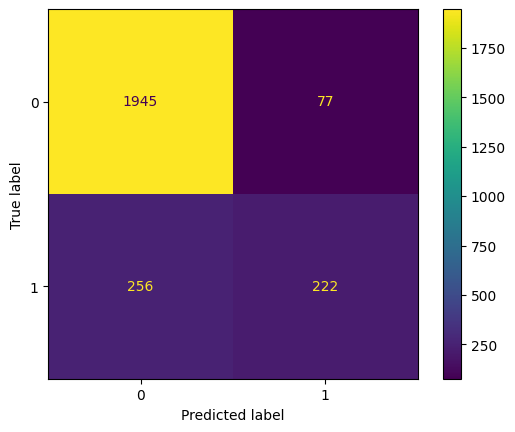

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()

In [19]:
score

0.8668